<a href="https://colab.research.google.com/github/Series-Parallel/Truncated_SVD_from_Scratch/blob/main/Truncated_SVD_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Truncated SVD Code with Galvish and Donoho rank formual

In this we will use the formula to find the rank so that we can truncate the matrix on the value at which we can get maximum result with least dimenions!

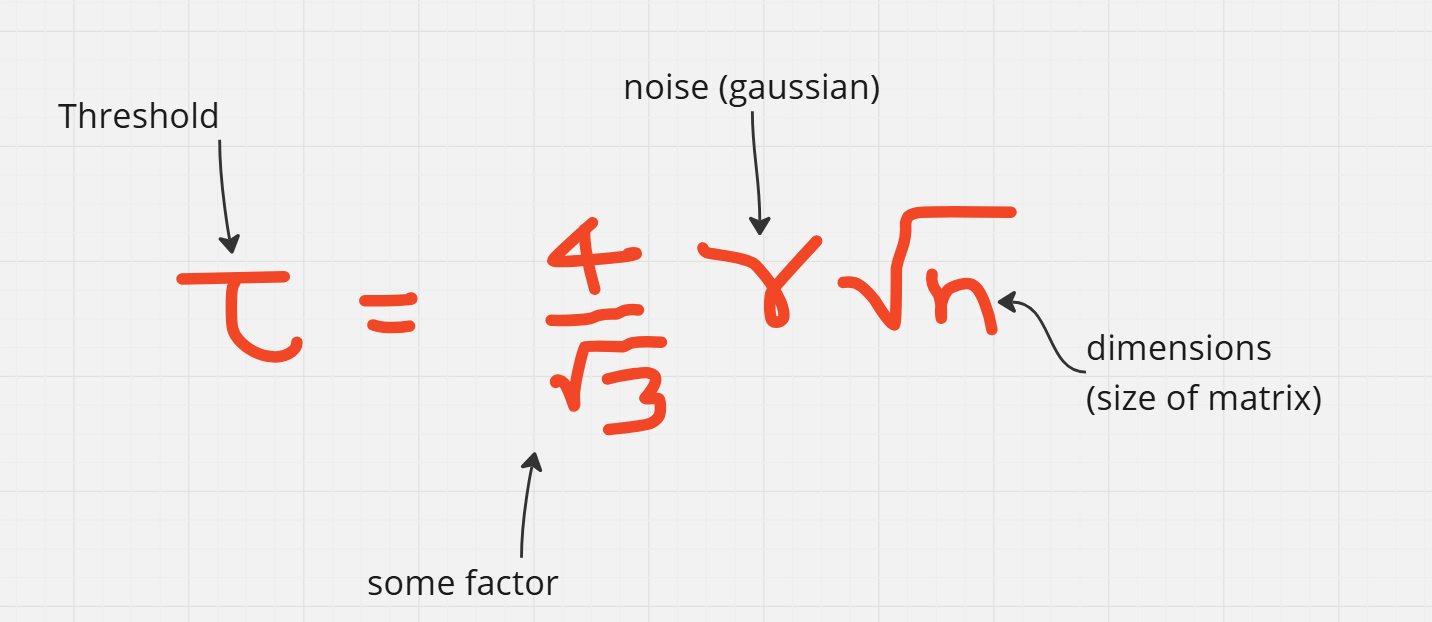



The above formula is derived by **Galvish and Donoho** in thier 2014's research paper and it is applied when we know the noise in the data!

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size':18})

In [4]:
t = np.arange(-3,3,0.01)

Now we will give values to left singular and right singular vectors and singular value matrix.

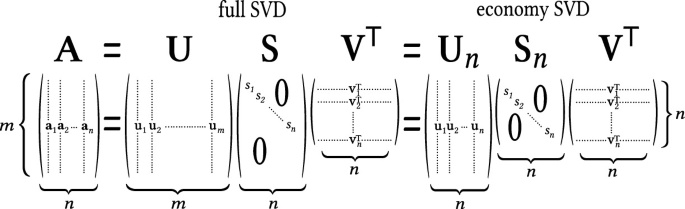

In [6]:
Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2,0],[0,0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

In [7]:
X = Utrue @ Strue @ Vtrue.T

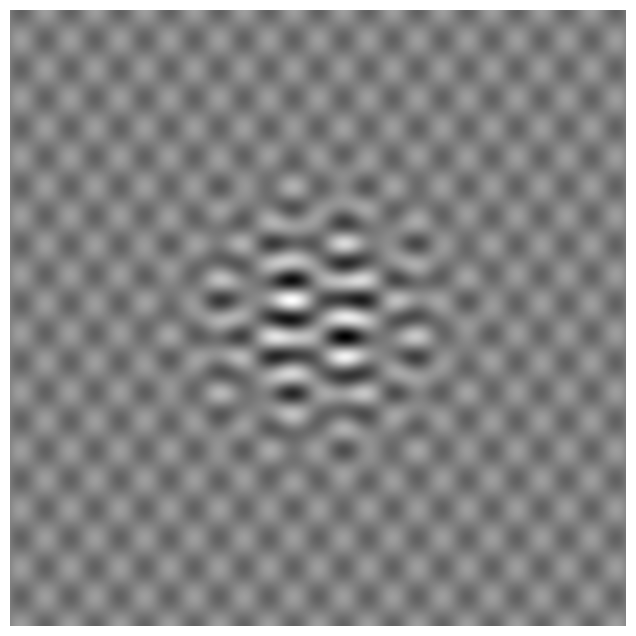

In [8]:
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

### now we will add the noise! Here we are adding the noise by ourselve but irl it will be present by itself.

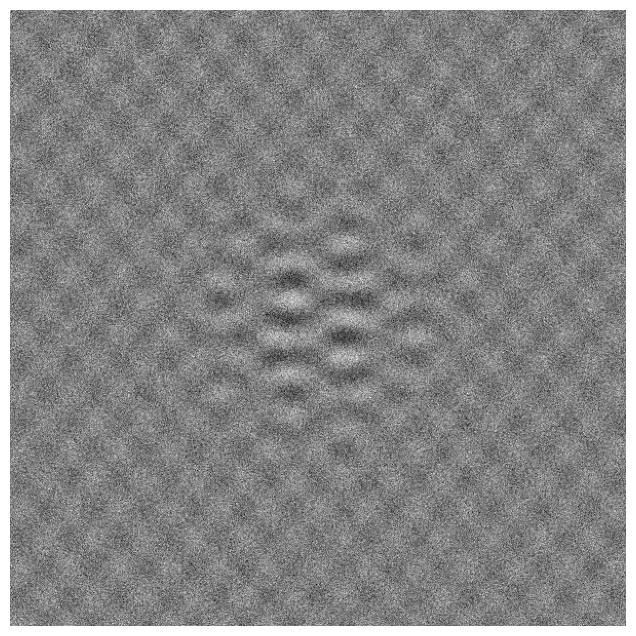

In [14]:
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('grey')
plt.axis('off')
plt.show()

### Now we apply the formula to get rank (but here we already know its going to be 2 :P)

In [15]:
U, S, VT = np.linalg.svd(Xnoisy, full_matrices = 0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma #hard threshold
r = np.max(np.where(S > cutoff)) # keep modes with sigma > cutoff

In [16]:
Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]

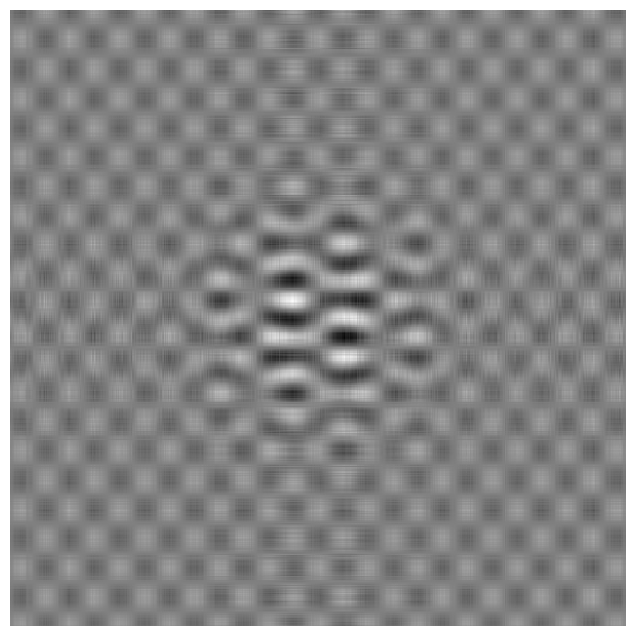

In [17]:
plt.imshow(Xclean)
plt.set_cmap('grey')
plt.axis('off')
plt.show()

### Above graph we used the Galvish-Donoho's formual to get rank and capture image's important mode. In the below code, we will use the naive method to capture the image and see how it goes!

In [18]:
cds = np.cumsum(S) / np.sum(S) # cumulative energy
r90 = np.min(np.where(cds > 0.90)) # find r to capture 90% energy

In [19]:
X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1), :]

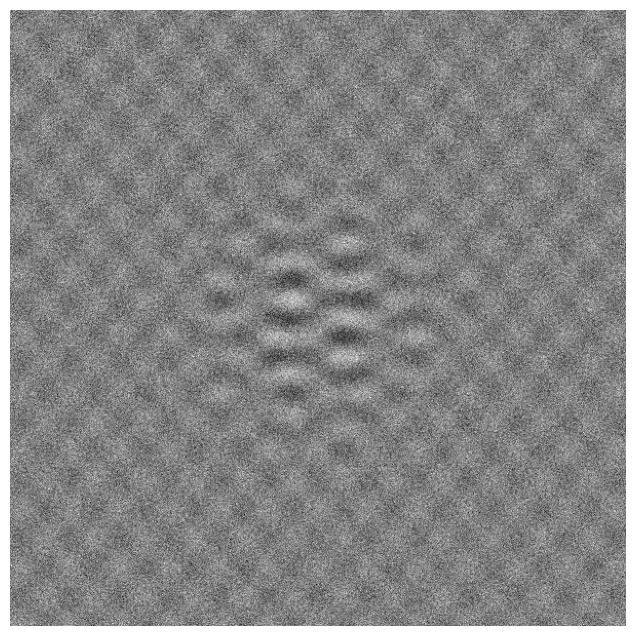

In [20]:
plt.imshow(X90)
plt.set_cmap('grey')
plt.axis('off')
plt.show()

So turns out that naive method "the usual method" didnt quite catch the image clearly as the Galvish-Donoho's method did!

## Plotting Singular Values

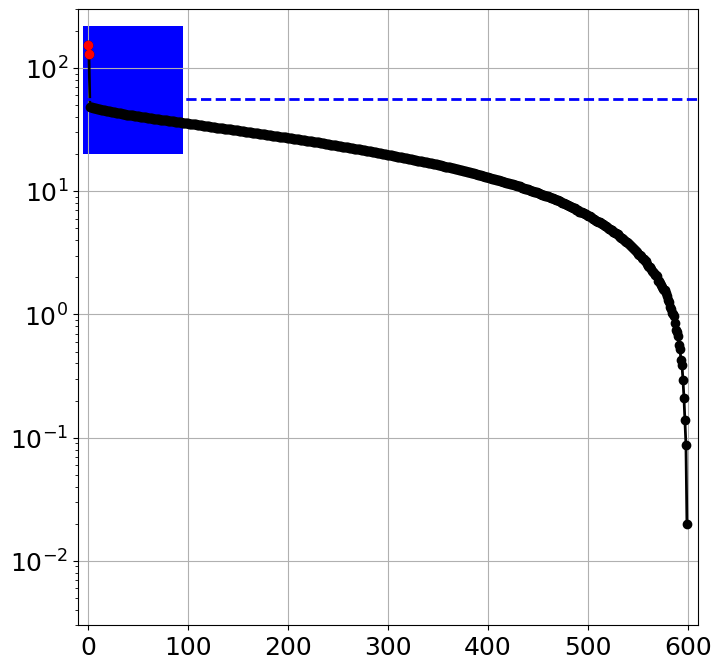

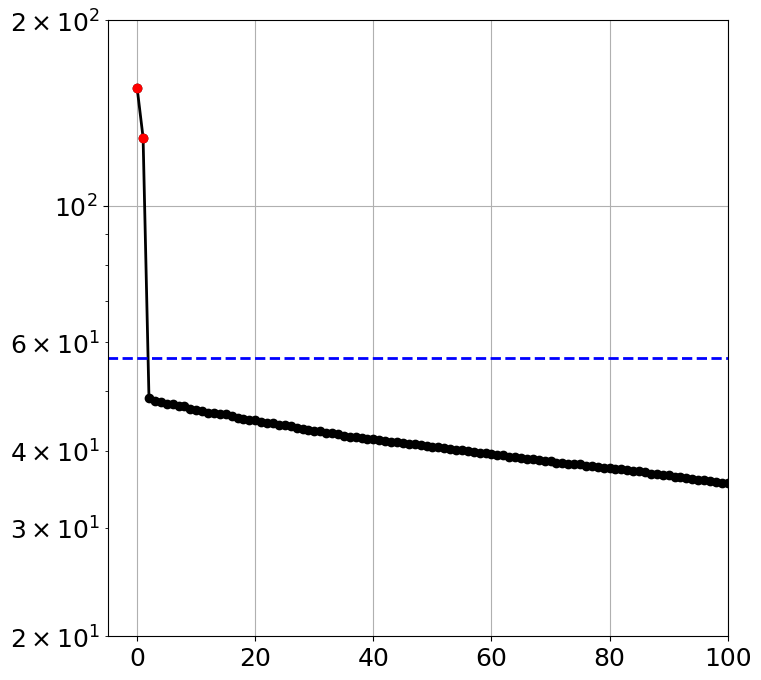

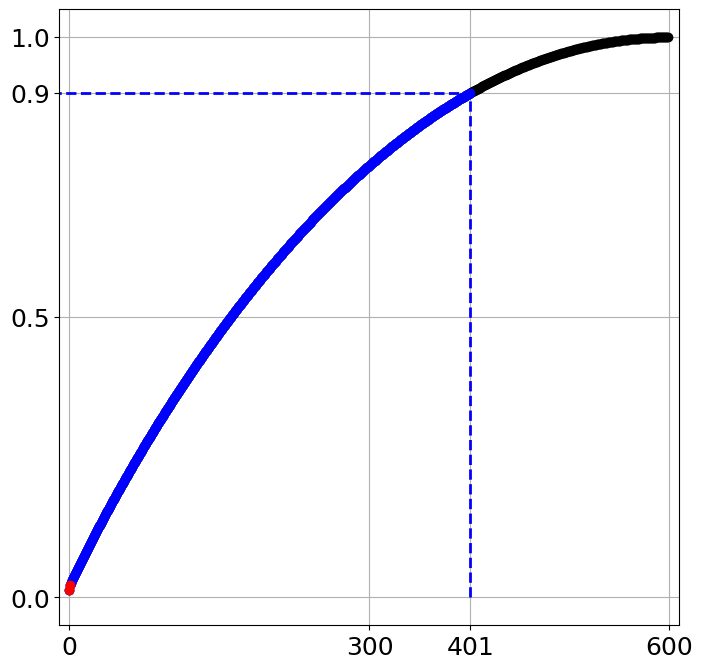

In [28]:
fig1, ax1 = plt.subplots(1)

ax1.semilogy(S, '-o', color='k', linewidth = 2)
ax1.semilogy(np.diag(S[:(r+1)]), 'o', color='r',linewidth = 2 )
ax1.plot(np.array([-20, N+20]),np.array([cutoff,cutoff]),'--', color='b', linewidth=2 )
rect = patches.Rectangle((-5,20),100, 200, linewidth=2, linestyle='--', facecolor='blue')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()


fig2, ax2 = plt.subplots(1)

ax2.semilogy(S, '-o', color='k', linewidth = 2)
ax2.semilogy(np.diag(S[:(r+1)]), 'o', color='r',linewidth = 2 )
ax2.plot(np.array([-20, N+20]),np.array([cutoff,cutoff]),'--', color='b', linewidth=2 )
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()


fig3, ax3 = plt.subplots(1)

ax3.plot(cds,'-o',color='k', linewidth=2)
ax3.plot(cds[:(r90+1)],'o',color='b', linewidth=2)
ax3.plot(cds[:(r+1)],'o',color='r', linewidth=2)
plt.xticks(np.array([0,300,r90,600]))
plt.yticks(np.array([0,0.5,0.9,1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90,r90,-10]),np.array([0,0.9,0.9]),'--',color='b',linewidth=2)
ax3.grid()
plt.show()